# Random Forest
In this notebook, I present the functionalities of random forests. For this purpose we use an artificial data set.

## Loading Packages

In [1]:
# Random Forest for regression in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
import pandas as pd

## Define data set

In [2]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

## Define and fit the model

In [3]:
# evaluate the model
model = RandomForestRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -18.080 (1.973)


Now we apply the model to the total data set.

In [4]:
# fit the model on the whole dataset
model.fit(X, y)

RandomForestRegressor()

Now that we have trained the model, we can make a prediction on unseen data

In [5]:
# make a single prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -274


## Grid Search CV

In [6]:
# defining the parameters
parameters= {'min_samples_leaf':[10,30],
             'max_features':["auto","sqrt"]} # max_features=n_features
# defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# defining the model
model = RandomForestRegressor(n_estimators=1000)
# defining the grid serach (full grid here)
#Define the scoring
reg=GridSearchCV(model,parameters,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1) # with n_jobs=-1 we run the computation in parallel
reg.fit(X=X, y=y)
# getting best parameters
print(reg.best_params_)

c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'max_features': 'auto', 'min_samples_leaf': 10}


In [7]:
reg

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestRegressor(n_estimators=1000), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [10, 30]},
             scoring='neg_mean_absolute_error')

No we let run the model for the best parameters on the total data set

In [8]:
# defining the model
model = RandomForestRegressor(n_estimators=1000, random_state=42,
                              max_features='auto',
                              min_samples_leaf=10)
# train model
model.fit(X=X, y=y)

c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', min_samples_leaf=10,
                      n_estimators=1000, random_state=42)

Now we can make a prediction

In [9]:
# make a single prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -274


## Variable importance

Text(0, 0.5, 'Feature Importance Score')

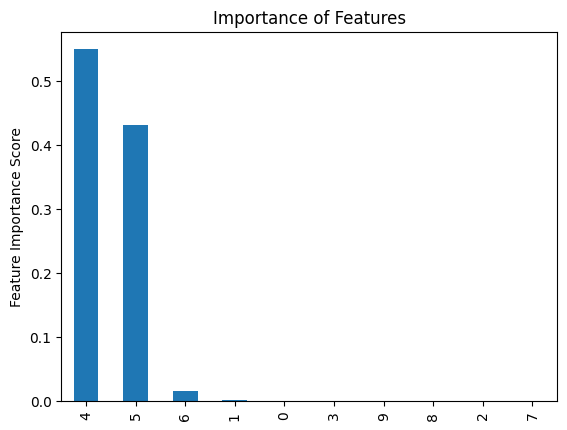

In [10]:
feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
pyplot.ylabel('Feature Importance Score')

## Additional Links
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74